In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import KFold
from sklearn.metrics import accuracy_score,f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [4]:
X=pd.read_csv("../data/pubmed/pubmed.csv",encoding = 'utf8',sep='\s+',header=None)
y=pd.read_csv("../data/pubmed/pubmed_label.csv",encoding = 'utf8',sep='\s+',header=None)



In [10]:
from sklearn.naive_bayes import GaussianNB
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X = np.array(X)
y = np.array(y)
clf = GaussianNB() 
accuracies=[]
f1scoremacro=[]
f1scoremicro=[]
kf = KFold(y.shape[0],n_folds=10)
for train_index, validation_index in kf:
    X_train, X_test = X[train_index], X[validation_index]
    y_train, y_test = y[train_index], y[validation_index]

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1_scoremacro = f1_score(y_test, y_pred,average='macro')
    f1_scoremicro = f1_score(y_test, y_pred,average='micro')
    accuracies.append(accuracy)
    f1scoremacro.append(f1_scoremacro)
    f1scoremicro.append(f1_scoremicro)
print(sum(accuracies)/float(len(accuracies)))
print(sum(f1scoremacro)/float(len(f1scoremacro)))
print(sum(f1scoremicro)/float(len(f1scoremicro)))
    

/home/nidhi/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.4236041073298857
0.39836392057418923
0.4236041073298857


In [14]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2)
X = np.array(X)
y = np.array(y)

accuracies=[]
f1scoremacro=[]
f1scoremicro=[]
kf = KFold(y.shape[0],n_folds=10)
for train_index, validation_index in kf:
    X_train, X_test = X[train_index], X[validation_index]
    y_train, y_test = y[train_index], y[validation_index]

    neigh.fit(X_train, y_train)

    y_pred = neigh.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1_scoremacro = f1_score(y_test, y_pred,average='macro')
    f1_scoremicro = f1_score(y_test, y_pred,average='micro')
    accuracies.append(accuracy)
    f1scoremacro.append(f1_scoremacro)
    f1scoremicro.append(f1_scoremicro)
print(sum(accuracies)/float(len(accuracies)))
print(sum(f1scoremacro)/float(len(f1scoremacro)))
print(sum(f1scoremicro)/float(len(f1scoremicro)))
    

/home/nidhi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


0.3332202931207823
0.315840383922573
0.3332202931207823


In [12]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train) 
y_predkn=neigh.predict(X_test)
accuracykn = accuracy_score(y_test, y_predkn)
f1scorekn = f1_score(y_test, y_predkn,average='macro')
print(accuracykn)
print(f1scorekn)


/home/nidhi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.3314009661835749
0.3220819474964835


In [7]:
shape=X.shape[1]
def kn(X_train,y_train,X_test,y_test):
    
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(X_train, y_train) 
    y_predkn=neigh.predict(X_test)
    accuracykn = accuracy_score(y_test, y_predkn)
    f1scorekn = f1_score(y_test, y_predkn,average='macro')
    #print(accuracykn)
    #print(f1scorekn)
    return accuracykn,f1scorekn

def nb(X_train,y_train,X_test,y_test):
    clf = GaussianNB()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred,average='macro')
    return accuracy, f1score
    

In [11]:
pubmed=pd.read_csv("../data/pubmed/pubmed.csv",encoding = 'utf8',sep='\s+',header=None)
from sklearn.metrics import f1_score
def evaluation_pubmedNBLIB():
    Accuracy=dict()
    F1scoremacro=dict()
    F1scoremicro=dict()
    clf = GaussianNB() 
    for i in [2,4,8,16,32]:
        filename =  '../Reduced_dim/pubmed/pubmed_%d.csv'%(i,)
        print(filename)
        X=pd.read_csv(filename,encoding = 'utf8',header=None)
        y=pd.read_csv("../data/pubmed/pubmed_label.csv",encoding = 'utf8',names = ["label"])
        
        X = np.array(X)
        y = np.array(y)
    
        kf = KFold(y.shape[0],n_folds=10)
        
        
        accuracies=[]
        f1scoremacro=[]
        f1scoremicro=[]
        for train_index, validation_index in kf:
           #print("TRAIN:", train_index, "TEST:", test_index)
            
            #print(X)
            
            X_train, X_test = X[train_index], X[validation_index]
            y_train, y_test = y[train_index], y[validation_index]
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            
            
            accuracy = accuracy_score(y_test, y_pred)
            f1_scoremacro = f1_score(y_test, y_pred,average='macro')
            f1_scoremicro = f1_score(y_test, y_pred,average='micro')
            accuracies.append(accuracy)
            f1scoremacro.append(f1_scoremacro)
            f1scoremicro.append(f1_scoremicro)
            
            
            
        Accuracy[i]=sum(accuracies)/float(len(accuracies))
        F1scoremacro[i]=sum(f1scoremacro)/float(len(f1scoremacro))
        F1scoremicro[i]=sum(f1scoremicro)/float(len(f1scoremicro))
    return Accuracy,F1scoremacro,F1scoremicro


In [13]:
AccuracyNBLIB,F1scoremacroNBLIB,F1scoremicroNBLIB = evaluation_pubmedNBLIB()

../Reduced_dim/pubmed/pubmed_2.csv
../Reduced_dim/pubmed/pubmed_4.csv


/home/nidhi/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nidhi/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


../Reduced_dim/pubmed/pubmed_8.csv
../Reduced_dim/pubmed/pubmed_16.csv
../Reduced_dim/pubmed/pubmed_32.csv


In [4]:
import pickle


f = open("evaluation_pubmedNBLIB", "wb")
pickle.dump(AccuracyNBLIB,f)
pickle.dump(F1scoremacroNBLIB, f)
pickle.dump(F1scoremicroNBLIB,f)
f.close()

In [5]:
print(AccuracyNBLIB)

{2: 0.40582614294011854, 4: 0.41505205308178034, 8: 0.42113996598996495, 16: 0.42872399386979615, 32: 0.43133268952197}


In [7]:
pubmed=pd.read_csv("../data/pubmed/pubmed.csv",encoding = 'utf8',sep='\s+',header=None)
from sklearn.metrics import f1_score
def evaluation_pubmedKNNLIB():
    Accuracy=dict()
    F1scoremacro=dict()
    F1scoremicro=dict()
    neigh = KNeighborsClassifier(n_neighbors=2)
    for i in [2,4,8,16,32]:
        filename =  '../Reduced_dim/pubmed/pubmed_%d.csv'%(i,)
        print(filename)
        X=pd.read_csv(filename,encoding = 'utf8',header=None)
        y=pd.read_csv("../data/pubmed/pubmed_label.csv",encoding = 'utf8',names = ["label"])
        
        X = np.array(X)
        y = np.array(y)
    
        kf = KFold(y.shape[0],n_folds=10)
        
        
        accuracies=[]
        f1scoremacro=[]
        f1scoremicro=[]
        for train_index, validation_index in kf:
           #print("TRAIN:", train_index, "TEST:", test_index)
            
            #print(X)
            
            X_train, X_test = X[train_index], X[validation_index]
            y_train, y_test = y[train_index], y[validation_index]
            neigh.fit(X_train, y_train)
            y_pred = neigh.predict(X_test)
            
            
            accuracy = accuracy_score(y_test, y_pred)
            f1_scoremacro = f1_score(y_test, y_pred,average='macro')
            f1_scoremicro = f1_score(y_test, y_pred,average='micro')
            accuracies.append(accuracy)
            f1scoremacro.append(f1_scoremacro)
            f1scoremicro.append(f1_scoremicro)
            
            
            
        Accuracy[i]=sum(accuracies)/float(len(accuracies))
        F1scoremacro[i]=sum(f1scoremacro)/float(len(f1scoremacro))
        F1scoremicro[i]=sum(f1scoremicro)/float(len(f1scoremicro))
    return Accuracy,F1scoremacro,F1scoremicro


In [8]:
AccuracyKNNLIB,F1scoremacroKNNLIB,F1scoremicroKNNLIB = evaluation_pubmedKNNLIB()

../Reduced_dim/pubmed/pubmed_2.csv


/home/nidhi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


../Reduced_dim/pubmed/pubmed_4.csv
../Reduced_dim/pubmed/pubmed_8.csv
../Reduced_dim/pubmed/pubmed_16.csv
../Reduced_dim/pubmed/pubmed_32.csv


In [11]:
import pickle


f = open("evaluation_pubmedKNNLIB", "wb")
pickle.dump(AccuracyKNNLIB,f)
pickle.dump(F1scoremacroKNNLIB, f)
pickle.dump(F1scoremicroKNNLIB,f)
f.close()

In [12]:
#plotting graph
def builtGraph(shape):
    accuracieskn=[]
    f1scoreskn=[]
    accuraciesnb=[]
    f1scoresnb=[]
    dimensions=[]
    for r_projections in range(2,int(shape/2 +1),2):
        dimensions.append(r_projections)
        print(r_projections)
        #print(X_data)
        filename =  '/Users/Vikas/Desktop/tipr-first-assignment-master/Reduced_dim/pubmed/pubmed_%d.csv'%(r_projections,)
        X=pd.read_csv(filename,encoding = 'utf8',header=None)
        y=pd.read_csv("..\data\pubmed\pubmed_label.csv",encoding = 'utf8',sep='\s+',header=None)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
        accuracykn,f1scorekn = kn(X_train,y_train,X_test,y_test)
        accuracieskn.append(accuracykn)
        f1scoreskn.append(f1scorekn)
        accuracynb,f1scorenb = nb(X_train,y_train,X_test,y_test)
        accuraciesnb.append(accuracynb)
        f1scoresnb.append(f1scorenb)
    return dimensions,accuracieskn,f1scoreskn,accuraciesnb,f1scoresnb

In [13]:
dimensions,accuracieskn,f1scoreskn,accuraciesnb,f1scoresnb = builtGraph(shape)

2
4

C:\Users\Vikas\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\Users\Vikas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vikas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64


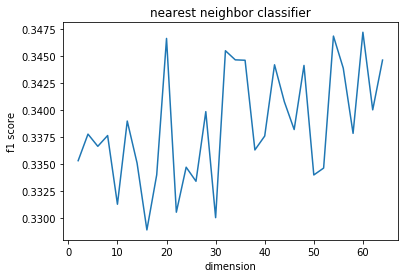

In [14]:
import matplotlib.pyplot as plt
plt.plot(dimensions,f1scoreskn)
plt.title('nearest neighbor classifier')
plt.xlabel('dimension')
plt.ylabel('f1 score')
plt.show()

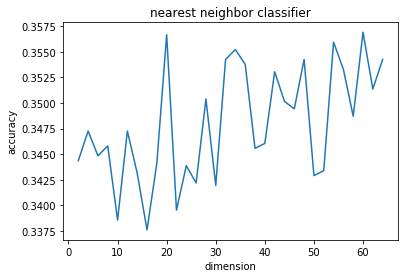

In [15]:
plt.plot(dimensions,accuracieskn)
plt.title('nearest neighbor classifier')
plt.xlabel('dimension')
plt.ylabel('accuracy')
plt.show()

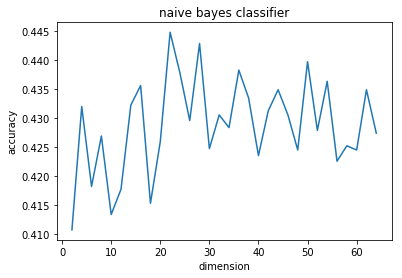

In [16]:
plt.plot(dimensions,accuraciesnb)
plt.title('naive bayes classifier')
plt.xlabel('dimension')
plt.ylabel('accuracy')
plt.show()

In [ ]:
print("hello")